# **Predicting Sentiment from Clothing Reviews**

By: Asad Mahmood

## [Table of Contents](#0)
1. [Data Set Information](#00)
1. [Overview](#1)
1. [Importing Modules and Reading the Dataset](#2)
1. [Calculating Word Counts and adding them to the Dataframe](#3)
1. [Densities of Class Names and  Selected Words from Reviews](#4)
1. [Building Sentiment Classifiers with different algos](#6)
   * [Logistic Regression ](#7)
   * [Naive Bayes](#8)
   * [Support Vector Machine (SVM)](#9)
   * [Neural Network](#10)
1. [Evaluating Models](#11) 
   * [Adding Results to the Dataframe](#12)
   * [ROC Curves and AUC](#13)
   * [Confusion Matrices](#14)
   * [Precision - Recall - F1-Score](#15)
1. [Conclusion](#16) 


## Data set <a class="anchor" id="00"></a>

This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”. The full description of the dataset can be accessed at <a href="https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews"> Kaggle</a>.


#### Return to Table of Contents <a class="anchor" id="0"></a>
<hr>

##  Overview <a class="anchor" id="1"></a>


In this kernel, I will use various algorithims to try to predict the customer sentiment from reviews. I will be using Logistic Regression, Naive Bayes, Support Vector Machine and Neural Networks. Each method has its pros and cons that is why i will be using these four different algos to see them. 


Here, I will start with examining the data and use some charts to reach more insights. Afterwards, I applied different models and compared them using various evaluting aspects.

#### Return to Table of Contents <a class="anchor" id="0"></a>
<hr>

## Importing Libraries and Reading the Dataset <a class="anchor" id="2"></a>

In order to make some analysis, we need to set our environment up. To do this, I firstly imported some modules and read the data. 


In [ ]:
#Importing Libraries

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import sklearn.metrics as mt
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Further, I decided that I do not need some columns and defined a new dataset which just has the columns I used.

In [ ]:
# Reading in data set
df1 = pd.read_csv('/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv')
df = df1[['Review Text','Rating','Class Name','Age']]
df.head()

,Review Text,Rating,Class Name,Age
0,Absolutely wonderful - silky and sexy and comf...,4,Intimates,33
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,34
2,I had such high hopes for this dress and reall...,3,Dresses,60
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Pants,50
4,This shirt is very flattering to all due to th...,5,Blouses,47


#### Return to Table of Contents <a class="anchor" id="0"></a>
<hr/>

## Calculating Word Counts and adding them to the Dataframe <a class="anchor" id="3"></a>

Adding the word counts to a dataframe is a very good practice because we might use these counts to reach some useful information. To do this, I defined the function ***wordcounts***.

In [ ]:
# fill NA values by space
df['Review Text'] = df['Review Text'].fillna('')

def word_count(str):
    counts = dict()
    words = str.lower().split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

# add new column to the dataframe
df['Word Counts'] = df['Review Text'].apply(word_count)
df.head()

,Review Text,Rating,Class Name,Age,Word Counts
0,Absolutely wonderful - silky and sexy and comf...,4,Intimates,33,"{'absolutely': 1, 'wonderful': 1, '-': 1, 'sil..."
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,34,"{'love': 2, 'this': 1, 'dress!': 1, 'it's': 2,..."
2,I had such high hopes for this dress and reall...,3,Dresses,60,"{'i': 5, 'had': 2, 'such': 1, 'high': 1, 'hope..."
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Pants,50,"{'i': 3, 'love,': 2, 'love': 1, 'this': 1, 'ju..."
4,This shirt is very flattering to all due to th...,5,Blouses,47,"{'this': 2, 'shirt': 1, 'is': 3, 'very': 1, 'f..."


#### Return to Table of Contents <a class="anchor" id="0"></a>
<hr/>

## Densities of Class Names and  Selected Words from Reviews <a class="anchor" id="4"></a>

In this section, I demonstrated the word densities which can be very informative. First, I selected some words which show the customer sentiments like love, hate, fantastic or regret. Second, since we do not know the product names, I decided to check the product class names. By doing this, we may at least learn the most prefered classes. Further, I thought that looking at the densities of all words in the reviews might be interesting.



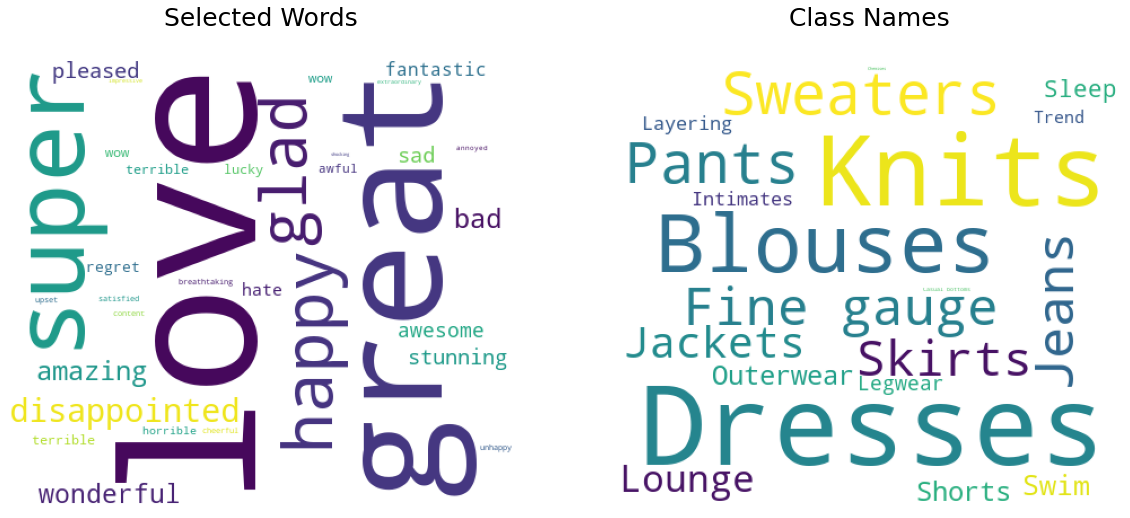

In [ ]:
# selecting some words to examine detailed 
selectedwords = ['awesome','great','fantastic','extraordinary','amazing','super',
                 'magnificent','stunning','impressive','wonderful','breathtaking',
                 'love','content','pleased','happy','glad','satisfied','lucky',
                 'shocking','cheerful','wow','sad','unhappy','horrible','regret',
                 'bad','terrible','annoyed','disappointed','upset','awful','hate',
                 'shit', 'terrible', 'wow']

def selectedcount(dic,word):
    if word in dic:
        return dic[word]
    else:
        return 0
    
dfwc = df.copy()  
for word in selectedwords:
    dfwc[word] = dfwc['Word Counts'].apply(selectedcount,args=(word,))
    
word_sum = dfwc[selectedwords].sum()

fig, ax = plt.subplots(1,2,figsize=(20,10))
wc0 = WordCloud(background_color='white',
                      width=450,
                      height=400 ).generate_from_frequencies(word_sum)

cn = df['Class Name'].fillna(" ").value_counts()
wc1 = WordCloud(background_color='white',
                      width=450,
                      height=400 
                     ).generate_from_frequencies(cn)

ax[0].imshow(wc0)
ax[0].set_title('Selected Words\n',size=25)
ax[0].axis('off')

ax[1].imshow(wc1)
ax[1].set_title('Class Names\n',size=25)
ax[1].axis('off')

plt.axis('off')
plt.show()

**Insights:**
It can be observed from figures and tables that positive words as love, great, super were used more. When we look at the classes, customers mostly prefered dress, knits and blouses. We may also see that dress and love are in the freequently used words within all reviews. 

#### Return to Table of Contents <a class="anchor" id="0"></a>
<hr/>

##  Building Sentiment Classifiers With Different Algos <a class="anchor" id="6"></a>



Since we do not have a column which shows the sentiment as positive or negative in the dataset, I defined a new sentiment column. To do this, I assumed the reviews which has 4 or higher rating as positive (True in the new dataframe) and 2 or lower rating as negative (False in the new dataframe). Also, I did not include the lines that has neutral ratings which are equal to 3. Following that, I splitted the data as training and test sets.

In [ ]:
# CountVectorizer() converts a collection of text documents to a matrix of token counts
vectorizer = CountVectorizer()

# Rating of 4 or higher -> positive, while the ones with 
# Rating of 2 or lower -> negative 
# Rating of 3 -> neutral
df = df[df['Rating'] != 3]
df['Sentiment'] = df['Rating'] >=4
df.head()

# split data
train_data,test_data = train_test_split(df,train_size=0.8,random_state=0)
# select the columns and 
# prepare data for the models 
X_train = vectorizer.fit_transform(train_data['Review Text'])
y_train = train_data['Sentiment']
X_test = vectorizer.transform(test_data['Review Text'])
y_test = test_data['Sentiment']

Then, I fitted the models one by one. Since, some of them take too much time, running each of them in different cells is a better choice.

### Logistic Regression

In [ ]:
start=dt.datetime.now()
lr = LogisticRegression()
lr.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:00.877419


### Naive Bayes

In [ ]:
start=dt.datetime.now()
nb = MultinomialNB()
nb.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:00.016777


### Support Vector Machine (SVM)

In [ ]:
start=dt.datetime.now()
svm = SVC()
svm.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:45.085100


### Neural Network

MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.

In [ ]:
start=dt.datetime.now()
nn = MLPClassifier()
nn.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:01:53.069023


**Best Time:** Naive Bayes

## Evaluating Models <a class="anchor" id="7"></a>

###Adding Results to the Dataframe

In [ ]:
# define a dataframe for the predictions
df2 = train_data.copy()
df2['Logistic Regression'] = lr.predict(X_train)
df2['Naive Bayes'] = nb.predict(X_train)
df2['SVM'] = svm.predict(X_train)
df2['Neural Network'] = nn.predict(X_train)
df2.head()

,Review Text,Rating,Class Name,Age,Word Counts,Sentiment,Logistic Regression,Naive Bayes,SVM,Neural Network
19218,I love this dress's gentle blue lace. the silh...,5,Dresses,35,"{'i': 2, 'love': 1, 'this': 1, 'dress's': 1, '...",True,True,True,True,True
3530,Beautiful choice...beautiful fit for my daught...,5,Knits,51,"{'beautiful': 1, 'choice...beautiful': 1, 'fit...",True,True,True,True,True
15663,"If you are shaped anything like me, you will h...",4,Dresses,25,"{'if': 1, 'you': 2, 'are': 1, 'shaped': 1, 'an...",True,True,True,True,True
21310,This top is so cute and of spectacular quality...,5,Blouses,33,"{'this': 2, 'top': 2, 'is': 2, 'so': 3, 'cute'...",True,True,True,True,True
15154,First saw this poncho on a petite blog and aft...,5,Sweaters,56,"{'first': 2, 'saw': 1, 'this': 3, 'poncho': 1,...",True,True,True,True,True


### ROC Curves and AUC

I  started my evaluation with ROC curve and AUC. As you may observe below, results look pretty good but it does not give much insight. To decide which model is the best we must also examine other evaluation metrics.

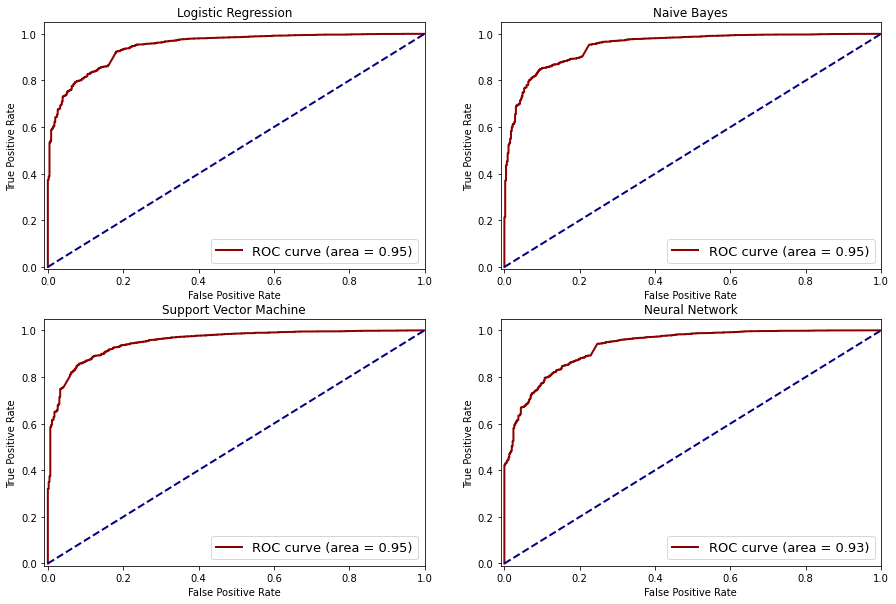

In [ ]:
pred_lr = lr.predict_proba(X_test)[:,1]
fpr_lr,tpr_lr,_ = roc_curve(y_test,pred_lr)
roc_auc_lr = auc(fpr_lr,tpr_lr)

pred_nb = nb.predict_proba(X_test)[:,1]
fpr_nb,tpr_nb,_ = roc_curve(y_test.values,pred_nb)
roc_auc_nb = auc(fpr_nb,tpr_nb)

pred_svm = svm.decision_function(X_test)
fpr_svm,tpr_svm,_ = roc_curve(y_test.values,pred_svm)
roc_auc_svm = auc(fpr_svm,tpr_svm)

pred_nn = nn.predict_proba(X_test)[:,1]
fpr_nn,tpr_nn,_ = roc_curve(y_test.values,pred_nn)
roc_auc_nn = auc(fpr_nn,tpr_nn)

f, axes = plt.subplots(2, 2,figsize=(15,10))
axes[0,0].plot(fpr_lr, tpr_lr, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_lr))
axes[0,0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0,0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0,0].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Logistic Regression')
axes[0,0].legend(loc='lower right', fontsize=13)

axes[0,1].plot(fpr_nb, tpr_nb, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_nb))
axes[0,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0,1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0,1].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Naive Bayes')
axes[0,1].legend(loc='lower right', fontsize=13)

axes[1,0].plot(fpr_svm, tpr_svm, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_svm))
axes[1,0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1,0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1,0].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Support Vector Machine')
axes[1,0].legend(loc='lower right', fontsize=13)

axes[1,1].plot(fpr_nn, tpr_nn, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_nn))
axes[1,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1,1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1,1].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Neural Network')
axes[1,1].legend(loc='lower right', fontsize=13);

**Insights:**

Logistic Regression, Naive Bayes and SVM have curves closer to the top-left corner indicating better performance. 

### Confusion Matrices

To reach more information, I also used confusion matrices. It can be seen that SVM does not give healthy results although it has high ROC values.

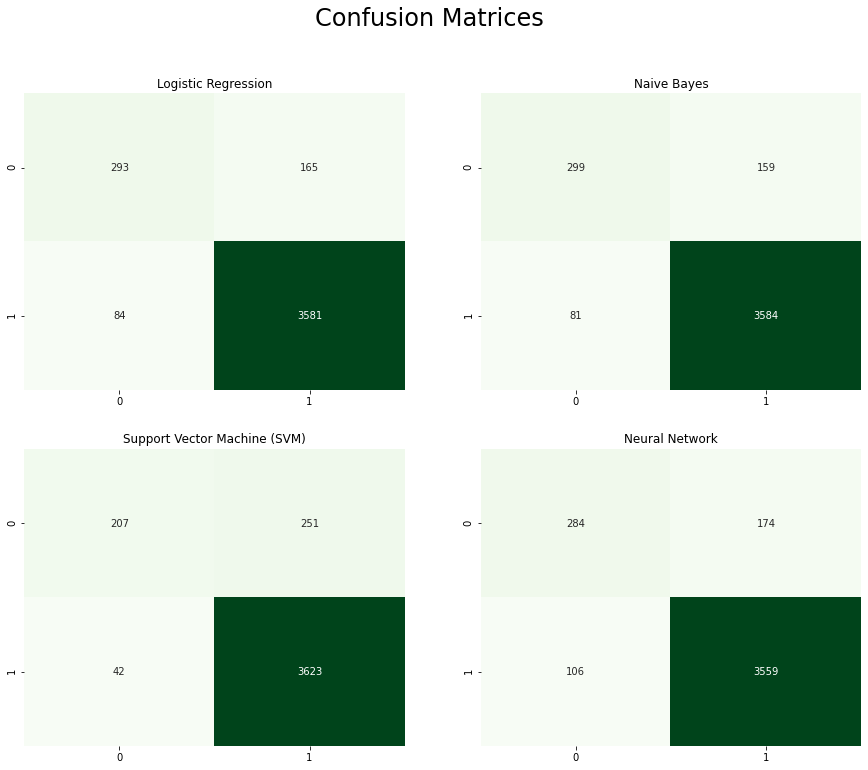

In [ ]:
# preparation for the confusion matrix
lr_cm=confusion_matrix(y_test.values, lr.predict(X_test))
nb_cm=confusion_matrix(y_test.values, nb.predict(X_test))
svm_cm=confusion_matrix(y_test.values, svm.predict(X_test))
nn_cm=confusion_matrix(y_test.values, nn.predict(X_test))

plt.figure(figsize=(15,12))
plt.suptitle("Confusion Matrices",fontsize=24)

plt.subplot(2,2,1)
plt.title("Logistic Regression")
sns.heatmap(lr_cm, annot = True, cmap="Greens",cbar=False, fmt='d');

plt.subplot(2,2,2)
plt.title("Naive Bayes")
sns.heatmap(nb_cm, annot = True, cmap="Greens",cbar=False, fmt='d');

plt.subplot(2,2,3)
plt.title("Support Vector Machine (SVM)")
sns.heatmap(svm_cm, annot = True, cmap="Greens",cbar=False, fmt='d');

plt.subplot(2,2,4)
plt.title("Neural Network")
sns.heatmap(nn_cm, annot = True, cmap="Greens",cbar=False, fmt='d');

**Insights:**

Naive Bayes has the best results in comparison to other algorithims. I will now calculate precision to make the final decision.

### Precision - Recall - F1-Score

Last but not least, I examined *Precision*, *Recall* and *F1-score*. They are defined as

$$\textbf{Precision} = \dfrac{TP}{TP + FP} \;\;\;\;\;\;\;\;\;\; \textbf{Recall} = \dfrac{TP}{TP + FN}$$


$$\textbf{}$$


$$\textbf{F}_{1} = 2 \; \dfrac{Precision \; \times \;Recall}{Precision + Recall} = \dfrac{2 \; TP}{2 \; TP + FN + FP}$$ 

We have already examined ROC curves and confusion matrices but this is not enough for a final decision. In our case precision might be the best choice to evaluate our models beacause we want to determine negative comments with less mistakes (To compare precisions, we must look at the precision values for *True*.). However, if we predict positive comments false, it will not have a negative impact. Of course for some other purposes other evaluation metrics may be useful too.

In [ ]:
print("Logistic Regression")
print(mt.classification_report(y_test, lr.predict(X_test)))
print("\n Naive Bayes")
print(mt.classification_report(y_test, nb.predict(X_test)))
print("\n Support Vector Machine (SVM)")
print(mt.classification_report(y_test, svm.predict(X_test)))
print("\n Neural Network")
print(mt.classification_report(y_test, nn.predict(X_test)))

Logistic Regression
              precision    recall  f1-score   support

       False       0.78      0.64      0.70       458
        True       0.96      0.98      0.97      3665

    accuracy                           0.94      4123
   macro avg       0.87      0.81      0.83      4123
weighted avg       0.94      0.94      0.94      4123


 Naive Bayes
              precision    recall  f1-score   support

       False       0.79      0.65      0.71       458
        True       0.96      0.98      0.97      3665

    accuracy                           0.94      4123
   macro avg       0.87      0.82      0.84      4123
weighted avg       0.94      0.94      0.94      4123


 Support Vector Machine (SVM)
              precision    recall  f1-score   support

       False       0.83      0.45      0.59       458
        True       0.94      0.99      0.96      3665

    accuracy                           0.93      4123
   macro avg       0.88      0.72      0.77      4123
weighted 

**Insights**
When looking into precision for true logistic regression, naive aayes and svm appear to have to same the score with a differencre of a few decimal points with Naive bayes being the best performing algo out of all.  

#### Return to Table of Contents <a class="anchor" id="0"></a>
<hr/>

## Conclusion <a class="anchor" id="8"></a>

When we look at the results of the all evaluation metrics in the evaluating models section, Naive Bayes and Logistic Regression gives the best results for our analysis. Thus, both of them are very effective at predicting sentiment. On the other hand, it seems that Naive Bayes takes less time and when we have a bigger dataset, this difference might increase and be an important advantage .

#### Return to Table of Contents <a class="anchor" id="0"></a>
<hr/>

In [ ]:
%%shell
jupyter nbconvert --to html /content/Sentiment_Analysis_of_Reviews_for_a_Cloth_shop.ipynb